In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score , confusion_matrix

In [6]:
l = []
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2]:
    l.append( np.log(i) )
    
print(l)

[-2.3025850929940455, -1.6094379124341003, -1.2039728043259361, -0.916290731874155, -0.6931471805599453, -0.5108256237659907, -0.35667494393873245, -0.2231435513142097, -0.10536051565782628, 0.0, 0.6931471805599453]


In [3]:
from tensorflow.examples.tutorials.mnist import input_data 

In [4]:
mnist = input_data.read_data_sets('MNIST_data/' , one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
mnist.train.num_examples

55000

In [10]:
mnist.test.images.shape

(10000, 784)

In [11]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
mnist.validation.images.shape

(5000, 784)

In [14]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
mnist.train.images[200].shape

(784,)

In [18]:
mnist.train.images[200].min()

0.0

In [19]:
mnist.train.images[200].max()

1.0

In [25]:
#  mnist.train.images[200]

# Visualizing the data

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# mnist.train.images[200].reshape(28,28)

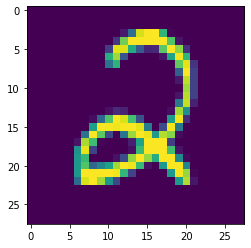

In [49]:
plt.imshow( mnist.train.images[200].reshape(28,28) )

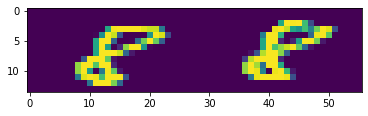

In [33]:
plt.imshow(mnist.train.images[7400].reshape(14,56))

In [40]:
batch_x , batch_y = mnist.train.next_batch(200)  # random 200 values

In [45]:
mnist.train.images[200][ : 3]

array([0., 0., 0.], dtype=float32)

In [48]:
mnist.train.labels[200]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
batch_x.shape

(200, 784)

In [50]:
batch_y.shape

(200, 10)

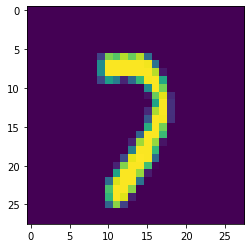

In [51]:
plt.imshow( batch_x[148].reshape(28,28) )

In [54]:
batch_y[148].argmax()   # label of the number

7

# Create the Model

In [56]:
# place holder to read value and label at runtime
x = tf.placeholder( tf.float32 , shape = [None , 784] )
y_true = tf.placeholder( tf.float32 , shape = [None , 10] )

weight = tf.Variable( tf.zeros([784 , 10] ) )
bias = tf.Variable( tf.zeros([10] ) )

init = tf.global_variables_initializer()

I = tf.add( tf.matmul(x,weight) , bias )

softmaxoutput = tf.nn.softmax(I)

# Loss Function 

loss_function = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( labels = y_true , logits = softmaxoutput ) )

# Optimizer 

gdo = tf.train.GradientDescentOptimizer( learning_rate = 0.5 )

train = gdo.minimize(loss_function)

In [57]:
# create session

sess = tf.Session()
sess.run(init)

In [58]:
for step in range(10000):
    batch_x , batch_y = mnist.train.next_batch(100)
    sess.run( train , feed_dict = { x : batch_x , y_true : batch_y } )

In [59]:
predict = sess.run( softmaxoutput , feed_dict = { x : mnist.test.images } )
predict

array([[6.06973405e-09, 1.35139938e-16, 3.19657345e-09, ...,
        9.99997616e-01, 1.08017628e-09, 6.98385278e-08],
       [4.03423701e-06, 2.92015717e-11, 9.99905705e-01, ...,
        1.19355425e-20, 5.10454868e-07, 2.36460656e-16],
       [4.07075884e-09, 9.98845458e-01, 8.02836206e-04, ...,
        3.30995827e-05, 1.64837300e-04, 5.83521887e-06],
       ...,
       [3.26210901e-13, 2.29398184e-12, 4.79447697e-11, ...,
        1.16993090e-06, 5.82977664e-05, 4.26985353e-04],
       [6.94896698e-06, 7.54825578e-06, 3.59382227e-07, ...,
        6.42855156e-08, 8.33855927e-01, 8.55059170e-07],
       [4.36873870e-09, 9.26259169e-19, 6.82357154e-07, ...,
        8.70900665e-18, 1.44499569e-11, 2.45249039e-14]], dtype=float32)

In [62]:
print( mnist.test.images.shape )
print( predict.shape )

(10000, 784)
(10000, 10)


In [63]:
result = sess.run( tf.argmax( predict , axis = 1 ) )
result

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [64]:
result.shape

(10000,)

In [66]:
labhot = sess.run( tf.argmax(mnist.test.labels , axis = 1 ) )
labhot

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [67]:
accuracy_score( labhot , result )

0.9255

# Validation set

In [68]:
# test with a single image
# fetch one image

test_image , test_label = mnist.validation.next_batch( 1 )

In [69]:
# run inference 

mymax = tf.argmax( softmaxoutput , 1 )
print("Predicted Value : ")
print( sess.run(mymax , feed_dict = { x : test_image} ) )

Predicted Value : 
[1]


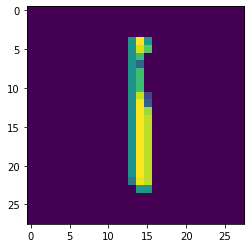

In [70]:
plt.imshow( test_image.reshape(28,28) )